In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

np.random.seed(123)

In [2]:
import acquire
import wrangle

In [3]:
df = acquire.get_zillow_data()

In [4]:
df = wrangle.wrangle_zillow(df)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
df = df.drop(columns=['fips'])

In [7]:
df.head()

,bedrooms,bathrooms,square_feet,value,year,tax
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68
11,0.0,0.0,1200.0,5328.0,1972.0,91.60
14,0.0,0.0,171.0,6920.0,1973.0,255.17


In [9]:
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate)

In [10]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [12]:
scaler.fit(train)
scaled_train = pd.DataFrame(data=scaler.transform(train))
scaled_validate = pd.DataFrame(data=scaler.transform(validate))
scaled_test = pd.DataFrame(data=scaler.transform(test))

Text(0.5, 1.0, 'Scaled Data')

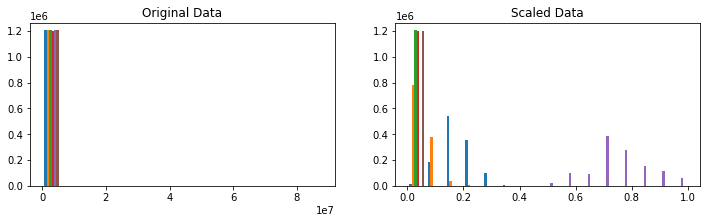

In [14]:
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist(train, bins=15)
plt.title('Original Data')
plt.subplot(122)
plt.hist(scaled_train, bins=15)
plt.title('Scaled Data')